In [1]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.simplefilter('always')

from scripts.a_data_loading_cleaning import run_load_clean_diagnose_data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



# Data Loading & Cleaning

In [2]:
csv_path = "results/controlled_results.csv"
df = run_load_clean_diagnose_data(csv_path)

⚠️ Dropped 2 rows due to inconsistent 'total_generated_tokens' values
- Filtering rows to dominant 'total_generated_tokens' = 16384
- Retained 88 of 90 rows
- Dropped configs: ['batching_1', 'batching_2']
- Dropped row indices: [4, 5]
Original distribution:
total_generated_tokens
14659     1
16284     1
16384    88
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
✅ FLOPs value is constant: 16949970993152
Original distribution:
flops
16949970993152    88
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
✅ Total generated tokens value is constant: 16384
Original distribution:
total_generated_tokens
16384    88
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:515: UserWarning: ⚠️ Dropped 2 rows due to inconsistent 'total_generated_tokens' values
  df = filter_by_dominant_token_count(df)


In [3]:
cols_to_describe = [
    'total_energy_kwh',
    'total_inference_time_sec',
    'average_latency_ms_per_batch',
    'throughput_queries_per_sec',
    'throughput_tokens_per_sec',
    'cpu_energy_total',
    'gpu_energy_total',
    'flops_per_token',
    'energy_per_token_kwh',
    'divergence_energy_flops'
]

df[cols_to_describe].describe()

,total_energy_kwh,total_inference_time_sec,average_latency_ms_per_batch,throughput_queries_per_sec,throughput_tokens_per_sec,cpu_energy_total,gpu_energy_total,flops_per_token,energy_per_token_kwh,divergence_energy_flops
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,8.800000e+01,8.800000e+01,8.800000e+01
mean,0.021104,38.438732,4662.541943,3.573381,457.392832,0.004661,0.016412,1.034544e+09,1.288077e-06,1.245067e-15
std,0.005771,13.666694,558.983884,1.217770,155.874513,0.001752,0.004104,0.000000e+00,3.522471e-07,3.404853e-16
min,0.003973,9.628563,2868.194596,0.867697,111.065177,0.001194,0.002724,1.034544e+09,2.425090e-07,2.344114e-16
25%,0.021053,36.740853,4593.879790,3.428112,438.798308,0.004547,0.016461,1.034544e+09,1.284950e-06,1.242045e-15
50%,0.021162,37.063840,4633.730808,3.453501,442.048106,0.004574,0.016542,1.034544e+09,1.291647e-06,1.248518e-15
75%,0.021235,37.338340,4667.292441,3.483860,445.934128,0.004598,0.016604,1.034544e+09,1.296080e-06,1.252803e-15
max,0.064102,147.516985,9029.341061,13.293780,1701.603812,0.018196,0.045785,1.034544e+09,3.912481e-06,3.781841e-15


# Exploratory Data Analysis (EDA)

⚠️ Dropped 2 rows due to inconsistent 'total_generated_tokens' values
- Filtering rows to dominant 'total_generated_tokens' = 16384
- Retained 88 of 90 rows
- Dropped configs: ['batching_1', 'batching_2']
- Dropped row indices: [4, 5]
Original distribution:
total_generated_tokens
14659     1
16284     1
16384    88
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
✅ FLOPs value is constant: 16949970993152
Original distribution:
flops
16949970993152    88
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
✅ Total generated tokens value is constant: 16384
Original distribution:
total_generated_tokens
16384    88
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:515: UserWarning: ⚠️ Dropped 2 rows due to inconsistent 'total_generated_tokens' values
  df = filter_by_dominant_token_count(df)


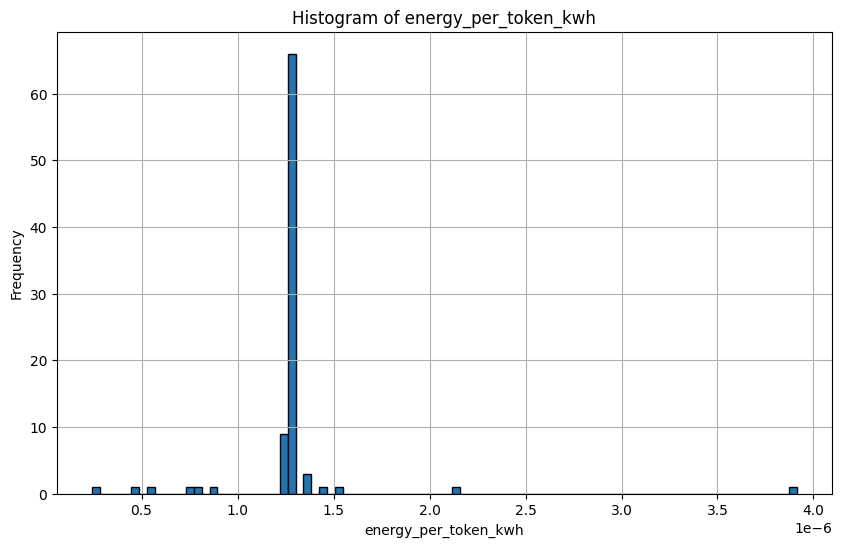

/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:17: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  plt.boxplot(data[column].dropna(), vert=False)


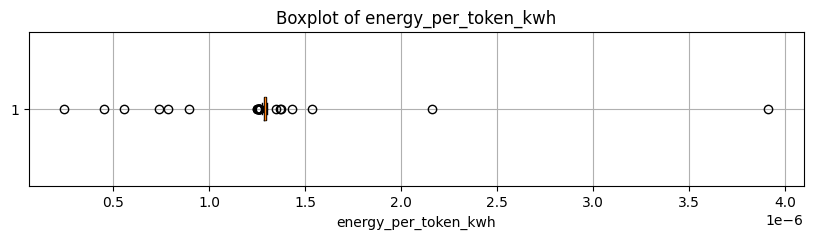

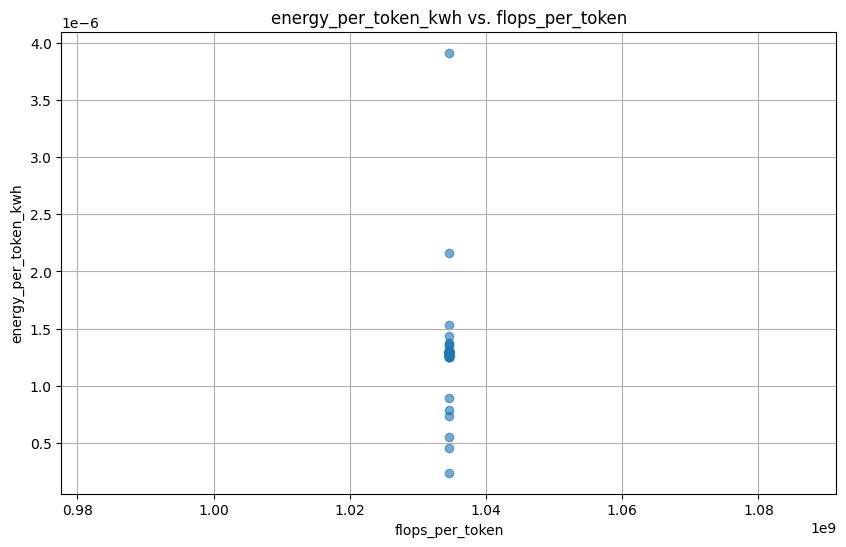

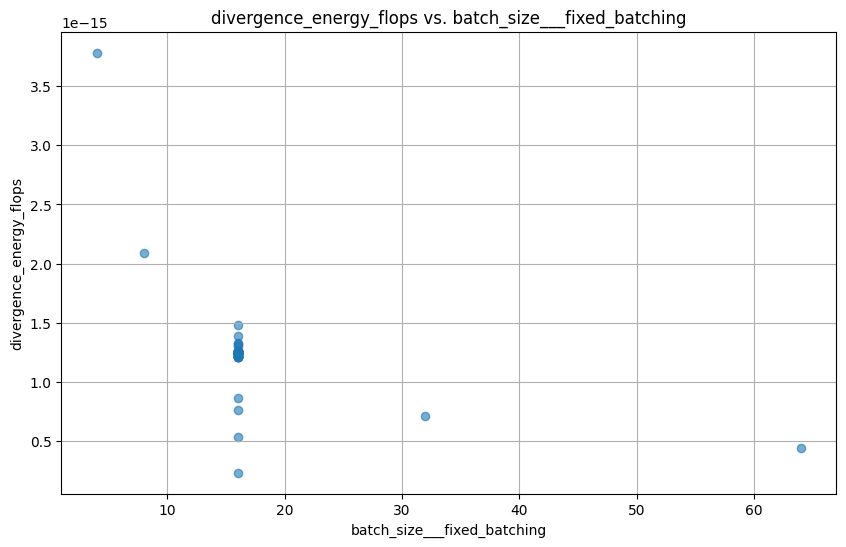

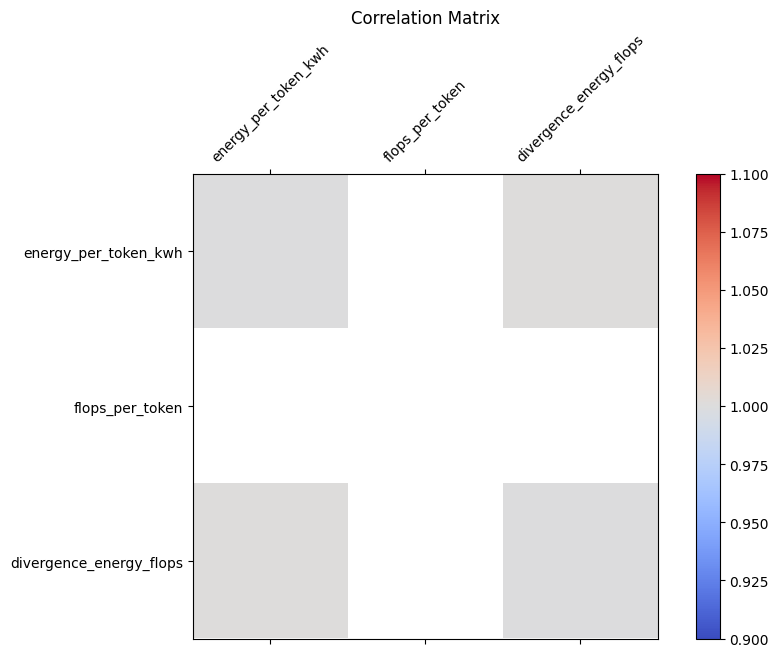

In [4]:
%run scripts/b_exploratory_data_analysis.py

To do: 
- [ ] crop outliers temporarily -> look at closer grouped in more detail
- [ ] also plot more 

# Controlled Experiment Visualisation

In [5]:
configs = ['num_processes', 'decoding', 'latency', 'batching', 'precis']
dfs = {config: df[df['config_name'].str.startswith(config)] for config in configs}

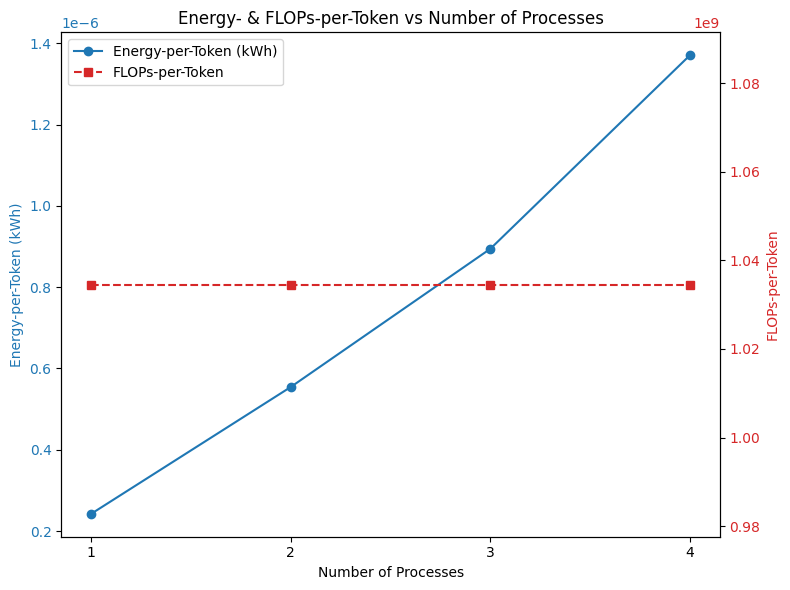

In [6]:
import matplotlib.pyplot as plt

# Use the 'num_processes' subset for plotting.
num_proc_df = dfs['num_processes'].copy()

# Ensure num_processes is an integer for plotting
num_proc_df['num_processes'] = num_proc_df['num_processes'].astype(int)

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Energy-per-Token on the left y-axis
color_energy = 'tab:blue'
ax1.set_xlabel('Number of Processes')
ax1.set_ylabel('Energy-per-Token (kWh)', color=color_energy)
ax1.plot(num_proc_df['num_processes'], num_proc_df['energy_per_token_kwh'],
         marker='o', linestyle='-', color=color_energy, label='Energy-per-Token (kWh)')
ax1.tick_params(axis='y', labelcolor=color_energy)
ax1.set_xticks(sorted(num_proc_df['num_processes'].unique()))

# Create a secondary axis for FLOPs-per-Token
ax2 = ax1.twinx()
color_flops = 'tab:red'
ax2.set_ylabel('FLOPs-per-Token', color=color_flops)
ax2.plot(num_proc_df['num_processes'], num_proc_df['flops_per_token'],
         marker='s', linestyle='--', color=color_flops, label='FLOPs-per-Token')
ax2.tick_params(axis='y', labelcolor=color_flops)

# Create a combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

# Add a title
plt.title('Energy- & FLOPs-per-Token vs Number of Processes')

fig.tight_layout()
plt.show()


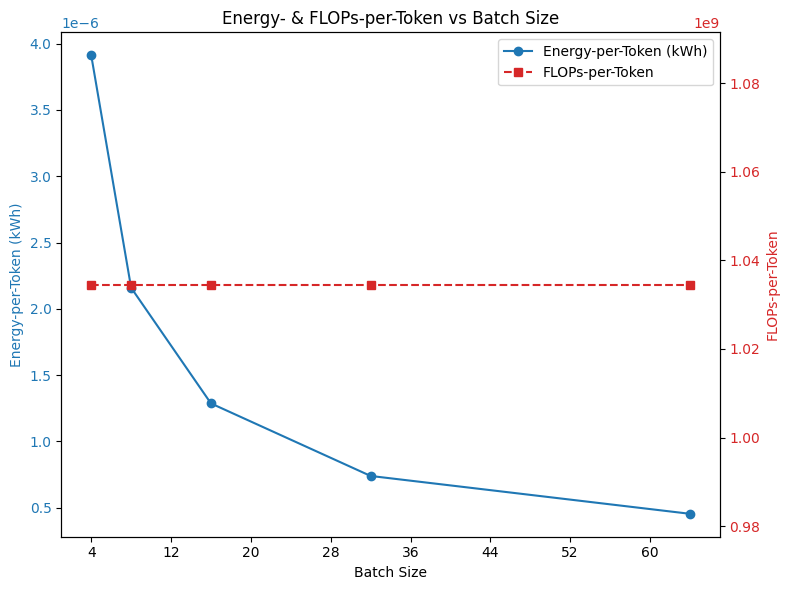

In [8]:
import numpy as np

# Use the 'num_processes' subset for plotting.
batching_df = dfs['batching'].copy()

# Ensure batching is an integer for plotting
batching_df['batch_size___fixed_batching'] = batching_df['batch_size___fixed_batching'].astype(int)

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Energy-per-Token on the left y-axis
color_energy = 'tab:blue'
ax1.set_xlabel('Batch Size')
ax1.set_ylabel('Energy-per-Token (kWh)', color=color_energy)
ax1.plot(batching_df['batch_size___fixed_batching'], batching_df['energy_per_token_kwh'],
         marker='o', linestyle='-', color=color_energy, label='Energy-per-Token (kWh)')
ax1.tick_params(axis='y', labelcolor=color_energy)
min_bs = batching_df['batch_size___fixed_batching'].min()
max_bs = batching_df['batch_size___fixed_batching'].max()
ax1.set_xticks(np.arange(min_bs, max_bs + 1, 8))

# Create a secondary axis for FLOPs-per-Token
ax2 = ax1.twinx()
color_flops = 'tab:red'
ax2.set_ylabel('FLOPs-per-Token', color=color_flops)
ax2.plot(batching_df['batch_size___fixed_batching'], batching_df['flops_per_token'],
         marker='s', linestyle='--', color=color_flops, label='FLOPs-per-Token')
ax2.tick_params(axis='y', labelcolor=color_flops)

# Create a combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

# Add a title
plt.title('Energy- & FLOPs-per-Token vs Batch Size')

fig.tight_layout()
plt.show()


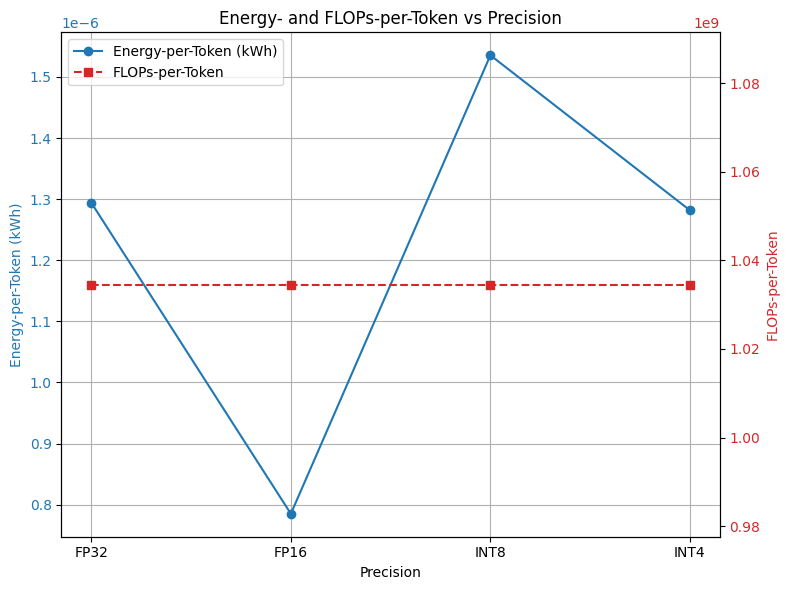

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create a new 'precision' column for plotting.
def determine_precision(row):
    if row.get('load_in_4bit', False):
        return 'INT4'
    elif row.get('load_in_8bit', False):
        return 'INT8'
    elif row.get('fp_precision') == 'torch.float16':
        return 'FP16'
    else:
        return 'FP32'

# Use the 'precis' subset for plotting.
precision_df = dfs['precis'].copy()
precision_df['precision'] = precision_df.apply(determine_precision, axis=1)

# Step 2: Define custom precision order.
precision_order = ['FP32', 'FP16', 'INT8', 'INT4']

# Step 3: Sort the DataFrame according to the precision order.
precision_df['precision'] = pd.Categorical(precision_df['precision'], categories=precision_order, ordered=True)
precision_df = precision_df.sort_values('precision')

# Step 4: Plotting using styling similar to the num_processes plot.
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Energy-per-Token on the left y-axis.
color_energy = 'tab:blue'
ax1.set_xlabel('Precision')
ax1.set_ylabel('Energy-per-Token (kWh)', color=color_energy)
ax1.plot(precision_df['precision'], precision_df['energy_per_token_kwh'],
         marker='o', linestyle='-', color=color_energy, label='Energy-per-Token (kWh)')
ax1.tick_params(axis='y', labelcolor=color_energy)
ax1.grid(True)

# Create a secondary axis for FLOPs-per-Token.
ax2 = ax1.twinx()
color_flops = 'tab:red'
ax2.set_ylabel('FLOPs-per-Token', color=color_flops)
ax2.plot(precision_df['precision'], precision_df['flops_per_token'],
         marker='s', linestyle='--', color=color_flops, label='FLOPs-per-Token')
ax2.tick_params(axis='y', labelcolor=color_flops)

# Create combined legend.
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

# Add a title.
plt.title('Energy- and FLOPs-per-Token vs Precision')

fig.tight_layout()
plt.show()


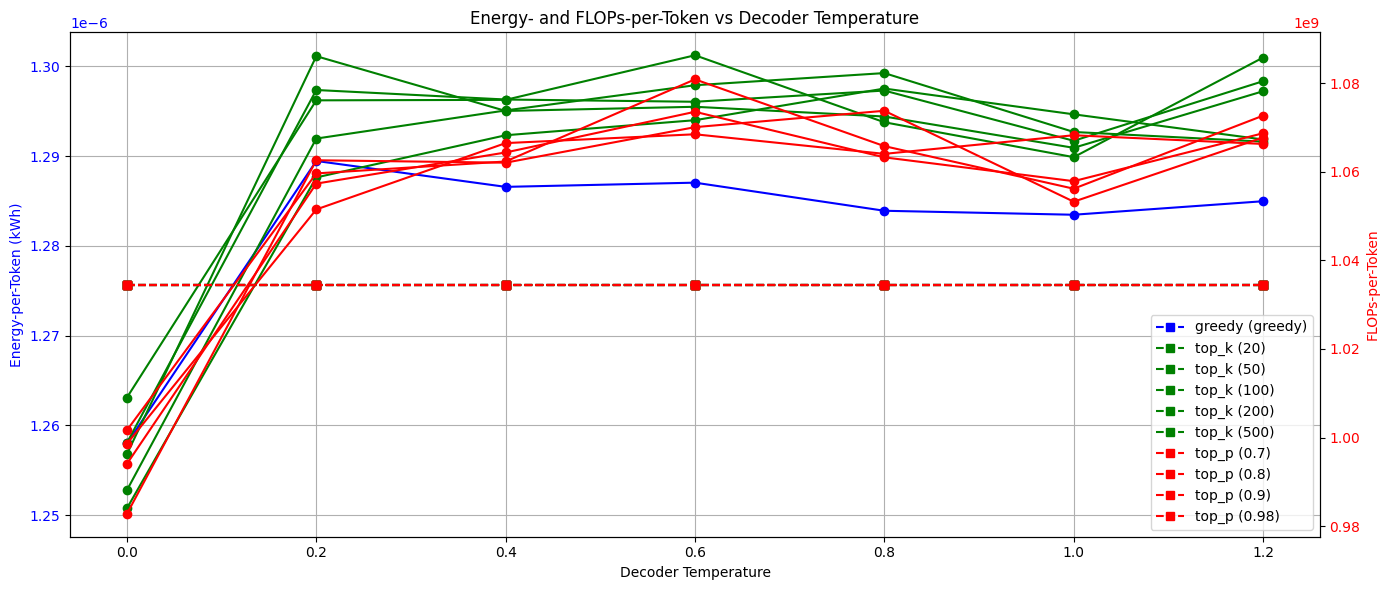

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Prepare the DataFrame ---
decoder_df = dfs['decoding'].copy()

# (Optional) Remove rows with missing decoding mode.
decoder_df = decoder_df[decoder_df['decoder_config_decoding_mode'].notna()].copy()

# Assign method and temperature directly from the table columns.
decoder_df['method'] = decoder_df['decoder_config_decoding_mode']
decoder_df['temperature'] = decoder_df['decoder_temperature']

# For top_k and top_p, assign the relevant config value; for greedy, just mark it as 'greedy'.
def get_config_value(row):
    if row['method'] == 'top_k':
        return row['decoder_top_k']
    elif row['method'] == 'top_p':
        return row['decoder_top_p']
    else:
        return 'greedy'

decoder_df['config_value'] = decoder_df.apply(get_config_value, axis=1)

# (Optional) Keep only the three desired methods.
decoder_df = decoder_df[decoder_df['method'].isin(['greedy', 'top_k', 'top_p'])].copy()

# Group the data by method and config_value so that each unique combination is its own series.
groups = decoder_df.groupby(['method', 'config_value'])

# Define colors based on method.
colors = {
    'greedy': 'blue',
    'top_k': 'green',
    'top_p': 'red'
}

# --- Plotting: Create a dual-axis plot ---
fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

for (method, config_value), subdf in groups:
    # Construct a label that shows the method and the extra parameter value.
    label_str = f"{method} ({config_value})"
    # Plot Energy-per-Token on the primary y-axis.
    ax1.plot(
        subdf['temperature'],
        subdf['energy_per_token_kwh'],
        marker='o',
        linestyle='-',
        label="_no_legend",
        color=colors.get(method, 'black')
    )
    # Plot FLOPs-per-Token on the secondary y-axis.
    ax2.plot(
        subdf['temperature'],
        subdf['flops_per_token'],
        marker='s',
        linestyle='--',
        label=label_str,
        color=colors.get(method, 'black')
    )

# Axis labels, title, grid and tick parameters.
ax1.set_xlabel('Decoder Temperature')
ax1.set_ylabel('Energy-per-Token (kWh)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2.set_ylabel('FLOPs-per-Token', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax1.set_title('Energy- and FLOPs-per-Token vs Decoder Temperature')
ax1.grid(True)

# Combine legends from both axes.
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower right')

fig.tight_layout()
plt.show()

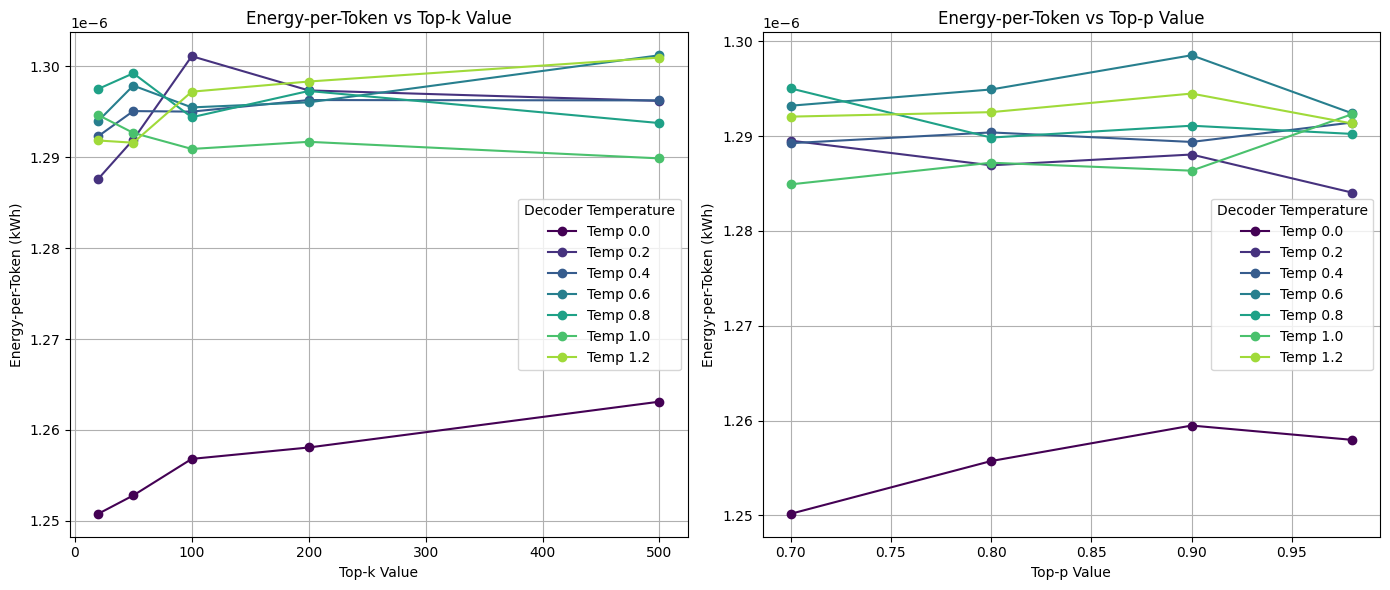

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume decoder_df is available from your dfs:
decoder_df = dfs['decoding'].copy()

# Filter to only include rows for top_k and top_p.
top_k_df = decoder_df[decoder_df['decoder_config_decoding_mode'] == 'top_k'].copy()
top_p_df = decoder_df[decoder_df['decoder_config_decoding_mode'] == 'top_p'].copy()

# Get unique decoder_temperature values in each subset.
unique_temps_top_k = sorted(top_k_df['decoder_temperature'].unique())
unique_temps_top_p = sorted(top_p_df['decoder_temperature'].unique())

# Use a colormap to assign a color for each unique temperature.
colormap = plt.cm.viridis
colors_top_k = {temp: colormap(i/len(unique_temps_top_k)) for i, temp in enumerate(unique_temps_top_k)}
colors_top_p = {temp: colormap(i/len(unique_temps_top_p)) for i, temp in enumerate(unique_temps_top_p)}

# Create two subplots (side-by-side).
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot for Top-k ---
for temp in unique_temps_top_k:
    subdf = top_k_df[top_k_df['decoder_temperature'] == temp]
    axes[0].plot(
        subdf['decoder_top_k'],                # x-axis: top_k values
        subdf['energy_per_token_kwh'],         # y-axis: Energy-per-Token
        marker='o',
        linestyle='-',
        label=f"Temp {temp}",
        color=colors_top_k[temp]
    )
axes[0].set_xlabel('Top-k Value')
axes[0].set_ylabel('Energy-per-Token (kWh)')
axes[0].set_title('Energy-per-Token vs Top-k Value')
axes[0].grid(True)
axes[0].legend(title="Decoder Temperature", loc='best')

# --- Plot for Top-p ---
for temp in unique_temps_top_p:
    subdf = top_p_df[top_p_df['decoder_temperature'] == temp]
    axes[1].plot(
        subdf['decoder_top_p'],                # x-axis: top_p values
        subdf['energy_per_token_kwh'],         # y-axis: Energy-per-Token
        marker='o',
        linestyle='-',
        label=f"Temp {temp}",
        color=colors_top_p[temp]
    )
axes[1].set_xlabel('Top-p Value')
axes[1].set_ylabel('Energy-per-Token (kWh)')
axes[1].set_title('Energy-per-Token vs Top-p Value')
axes[1].grid(True)
axes[1].legend(title="Decoder Temperature", loc='best')

fig.tight_layout()
plt.show()


# Modeling

In [12]:
%run scripts/c_base_regression.py

ImportError: cannot import name 'get_cleaned_df' from 'scripts.a_data_loading_cleaning' (/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py)

In [13]:
%run scripts/d_mixed_effects_model.py

ImportError: cannot import name 'df_controlled_cleaned' from 'scripts.a_data_loading_cleaning' (/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py)

To do
- [ ] identify groupings:
   - [ ] use model (even though currently only one model)
   - [ ] use config_name and date_time
   - [ ] use decoder configs
   - [ ] latency configs 